In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import  StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import resample


## Dataset Source https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [2]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[["gender", "ever_married",'work_type','Residence_type','smoking_status']] = enc.fit_transform(df[["gender", "ever_married",'work_type','Residence_type','smoking_status']])


In [4]:
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.854067,1.071534,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.500000,0.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.100000,2.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,33.100000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [5]:
df.dropna(inplace = True)

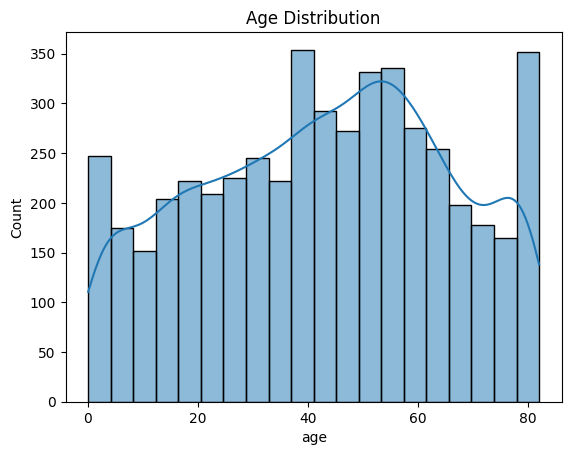

In [6]:
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

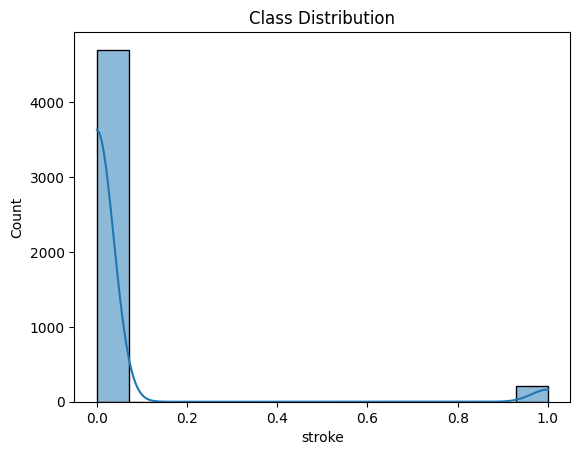

In [7]:
sns.histplot(df['stroke'], kde=True)
plt.title('Class Distribution')
plt.show()

In [8]:
len(df[df['stroke']==1])

209

# The number of instances where a person has a stroke is very few here in comparison with the instances where a person did not have any  stroke. This can result in bias or false negatives.

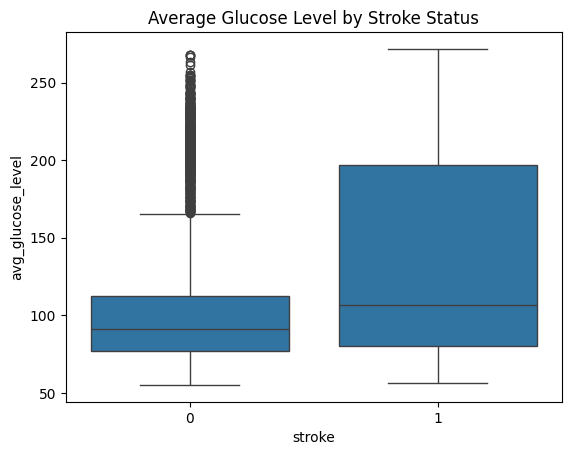

In [9]:
# Box plot for average glucose level
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Average Glucose Level by Stroke Status')
plt.show()

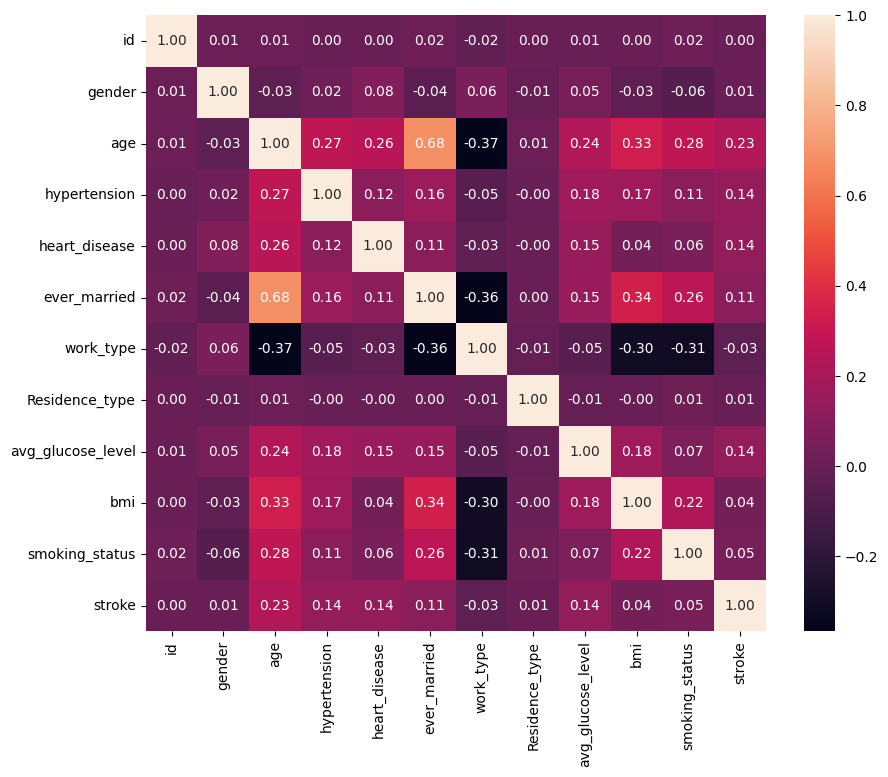

In [10]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

# The accuracy score of 98.82% can be misleading here. The precision and recall for predicting a stroke are 0.0 which means the model failed to correctly predict any true positive cases of stroke

In [11]:
from sklearn.ensemble import RandomForestClassifier



X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104,
                                   test_size=0.2,
                                   shuffle=True)


model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print(classification_report(y_test,y_pred))


Test Accuracy: 0.9592668024439919
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       942
           1       0.00      0.00      0.00        40

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# The precision is high here in case of stroke patients which means the model can predict stroke correctly. However, the low recall 0.02 suggests that the model often ppredicts strokes wrongly. The f1 score is also very low here.

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print(classification_report(y_test,y_pred))

Test Accuracy: 0.960285132382892
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       942
           1       1.00      0.03      0.05        40

    accuracy                           0.96       982
   macro avg       0.98      0.51      0.51       982
weighted avg       0.96      0.96      0.94       982



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:

from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=2)

clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print(classification_report(y_test,y_pred))

Test Accuracy: 0.9562118126272913
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       942
           1       0.00      0.00      0.00        40

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print(classification_report(y_test,y_pred))

Test Accuracy: 0.9562118126272913
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       942
           1       0.00      0.00      0.00        40

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982



# Like before, the precision, recall and f1_score is low in KNN and Naive Bayes algorithm as well. This has happened because of the imbalance in the dataset.

# Kfold Cross Validation Method

In [15]:
rf= []
lr= []
knn =[]
nb =[]

In [16]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = 5)
kf

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [17]:
X= df.drop(['id','stroke'],axis = 1)
y = df['stroke']

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba)
    }


In [19]:
for train_index, test_index in kf.split(X,y):

  X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

  rf.append(get_score(RandomForestClassifier(),  X_train, X_test, y_train, y_test))
  lr.append(get_score(LogisticRegression(),  X_train, X_test, y_train, y_test))
  knn.append(get_score(KNeighborsClassifier(),  X_train, X_test, y_train, y_test))
  nb.append(get_score(GaussianNB(),  X_train, X_test, y_train, y_test))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the num

# Random Forest Scores

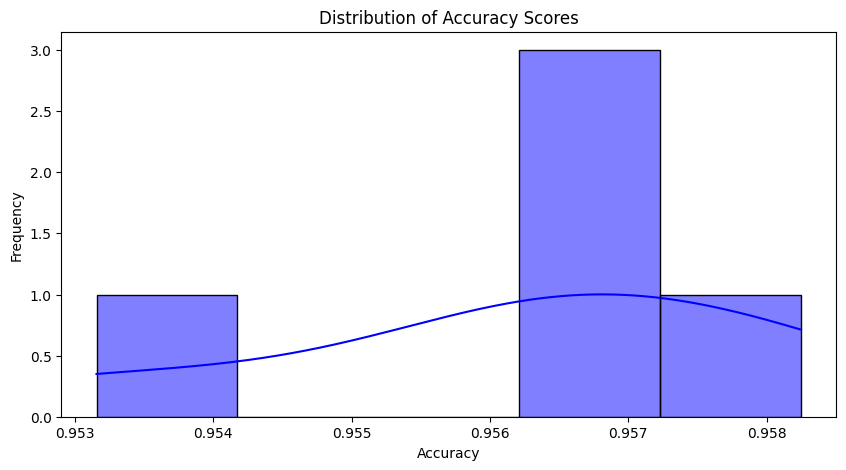

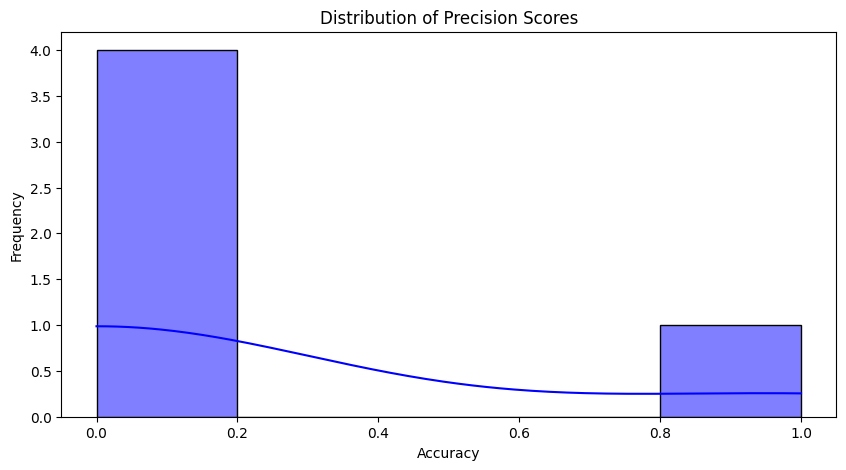

Maximum Accuracy achieved by Random Forest 0.9582484725050916
Maximum Precision achieved by Random Forest 1.0
Maximum Recall achieved by Random Forest 0.046511627906976744
Maximum F1 Score achieved by Random Forest 0.046511627906976744
Maximum roc_auc achieved by Random Forest 0.7977203647416413


In [20]:
accuracy = []
prec = []
recall = []
f1 = []
roc_auc = []

for sc in rf:
  accuracy.append(sc['accuracy'])
  prec.append(sc['precision'])
  recall.append(sc['f1_score'])
  f1.append(sc['f1_score'])
  roc_auc.append(sc['roc_auc'])

plt.figure(figsize=(10, 5))
sns.histplot(accuracy, kde=True, color='blue', bins=5)
plt.title('Distribution of Accuracy Scores')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(prec, kde=True, color='blue', bins=5)
plt.title('Distribution of Precision Scores')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

print(f'Maximum Accuracy achieved by Random Forest {max(accuracy)}')
print(f'Maximum Precision achieved by Random Forest {max(prec)}')
print(f'Maximum Recall achieved by Random Forest {max(recall)}')
print(f'Maximum F1 Score achieved by Random Forest {max(f1)}')
print(f'Maximum roc_auc achieved by Random Forest {max(roc_auc)}')


# Logistic Regression Scores

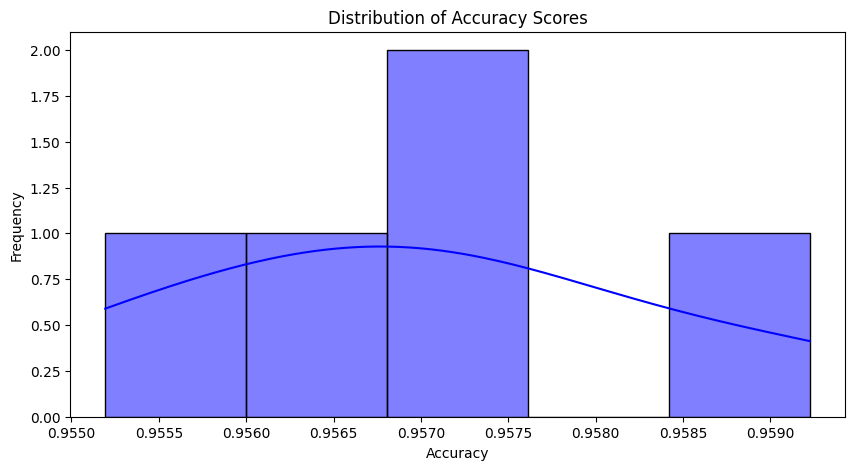

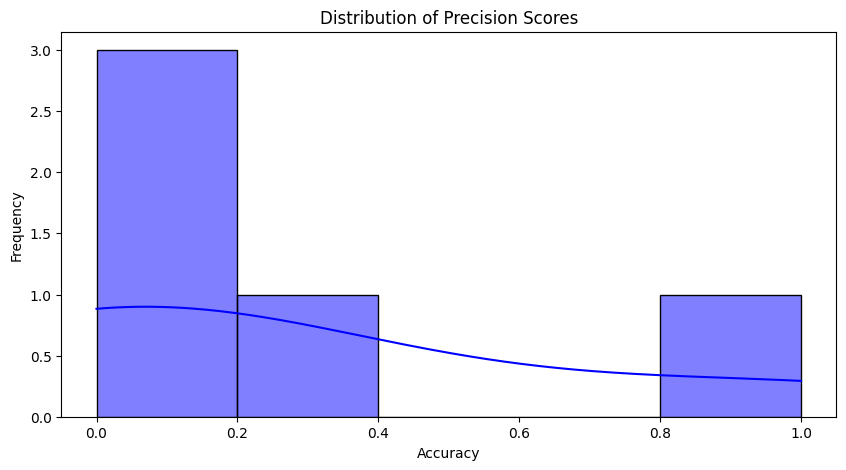

Maximum Accuracy achieved by Logistic Regression 0.9592252803261978
Maximum Precision achieved by Logistic Regression 1.0
Maximum Recall achieved by Logistic Regression 0.12
Maximum F1 Score achieved by Logistic Regression 0.12
Maximum roc_auc achieved by Logistic Regression 0.8543819655521783


In [21]:
accuracy = []
prec = []
recall = []
f1 = []
roc_auc = []

for sc in lr:
  accuracy.append(sc['accuracy'])
  prec.append(sc['precision'])
  recall.append(sc['f1_score'])
  f1.append(sc['f1_score'])
  roc_auc.append(sc['roc_auc'])
plt.figure(figsize=(10, 5))
sns.histplot(accuracy, kde=True, color='blue', bins=5)
plt.title('Distribution of Accuracy Scores')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(prec, kde=True, color='blue', bins=5)
plt.title('Distribution of Precision Scores')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

print(f'Maximum Accuracy achieved by Logistic Regression {max(accuracy)}')
print(f'Maximum Precision achieved by Logistic Regression {max(prec)}')
print(f'Maximum Recall achieved by Logistic Regression {max(recall)}')
print(f'Maximum F1 Score achieved by Logistic Regression {max(f1)}')
print(f'Maximum roc_auc achieved by Logistic Regression {max(roc_auc)}')


# KNN Scores

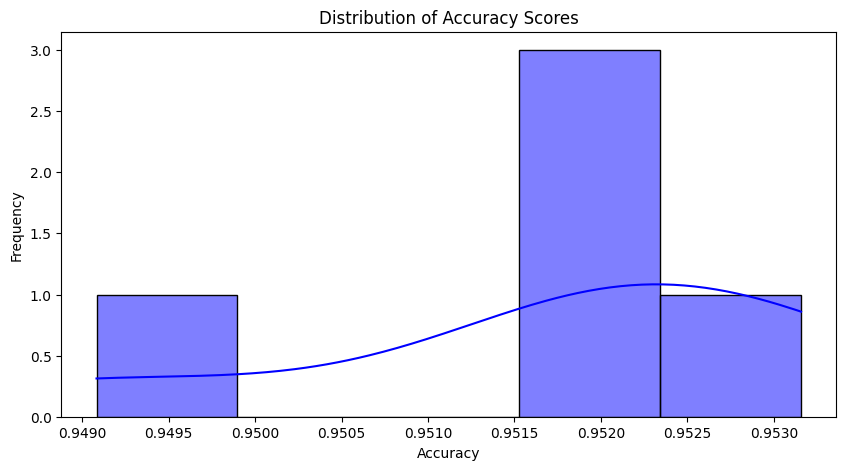

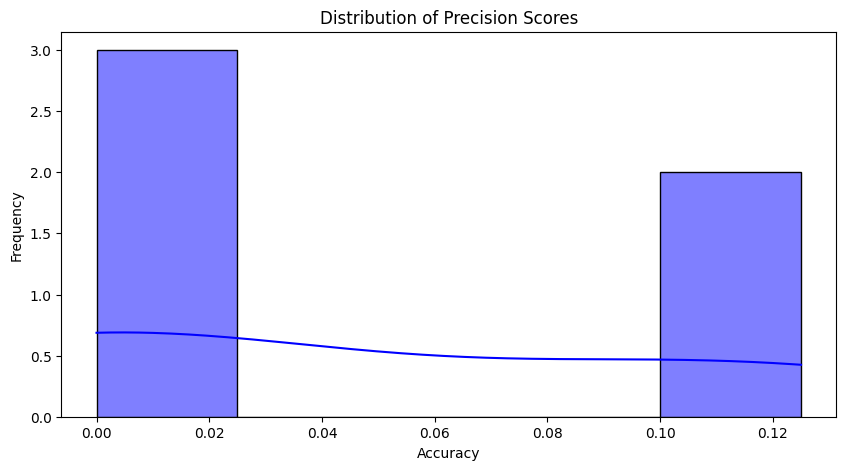

Maximum Accuracy achieved by Knn 0.9531568228105907
Maximum Precision achieved by Knn 0.125
Maximum Recall achieved by Knn 0.04081632653061225
Maximum F1 Score achieved by Knn 0.04081632653061225
Maximum roc_auc achieved by Knn 0.6995588998443176


In [22]:
accuracy = []
prec = []
recall = []
f1 = []
roc_auc = []

for sc in knn:
  accuracy.append(sc['accuracy'])
  prec.append(sc['precision'])
  recall.append(sc['f1_score'])
  f1.append(sc['f1_score'])
  roc_auc.append(sc['roc_auc'])
plt.figure(figsize=(10, 5))
sns.histplot(accuracy, kde=True, color='blue', bins=5)
plt.title('Distribution of Accuracy Scores')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(prec, kde=True, color='blue', bins=5)
plt.title('Distribution of Precision Scores')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

print(f'Maximum Accuracy achieved by Knn {max(accuracy)}')
print(f'Maximum Precision achieved by Knn {max(prec)}')
print(f'Maximum Recall achieved by Knn {max(recall)}')
print(f'Maximum F1 Score achieved by Knn {max(f1)}')
print(f'Maximum roc_auc achieved by Knn {max(roc_auc)}')


# Naive Bayes Scores

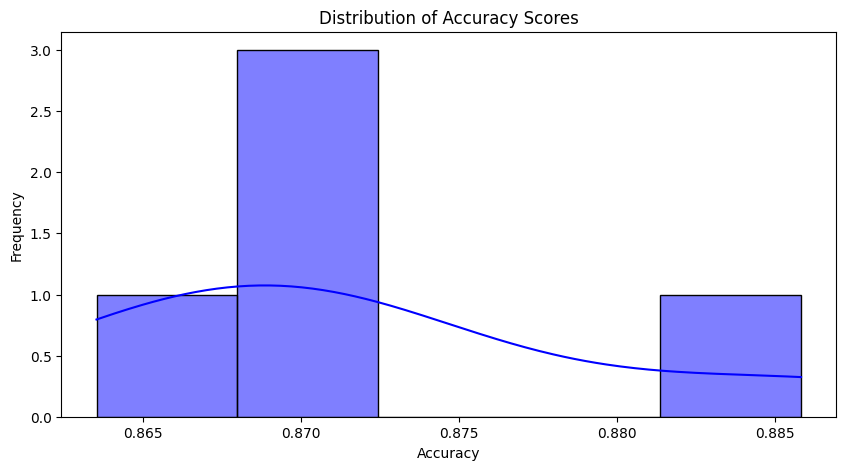

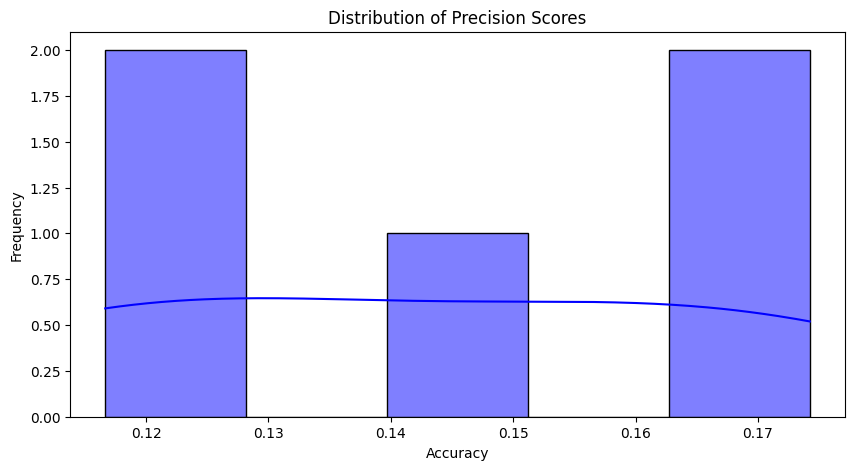

Maximum Accuracy achieved by Naive Bayes 0.8858307849133538
Maximum Precision achieved by Naive Bayes 0.17424242424242425
Maximum Recall achieved by Naive Bayes 0.26436781609195403
Maximum F1 Score achieved by Naive Bayes 0.26436781609195403
Maximum roc_auc achieved by Naive Bayes 0.8359422492401216


In [23]:
accuracy = []
prec = []
recall = []
f1 = []
roc_auc = []

for sc in nb:
  accuracy.append(sc['accuracy'])
  prec.append(sc['precision'])
  recall.append(sc['f1_score'])
  f1.append(sc['f1_score'])
  roc_auc.append(sc['roc_auc'])
plt.figure(figsize=(10, 5))
sns.histplot(accuracy, kde=True, color='blue', bins=5)
plt.title('Distribution of Accuracy Scores')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(prec, kde=True, color='blue', bins=5)
plt.title('Distribution of Precision Scores')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

print(f'Maximum Accuracy achieved by Naive Bayes {max(accuracy)}')
print(f'Maximum Precision achieved by Naive Bayes {max(prec)}')
print(f'Maximum Recall achieved by Naive Bayes {max(recall)}')
print(f'Maximum F1 Score achieved by Naive Bayes {max(f1)}')
print(f'Maximum roc_auc achieved by Naive Bayes {max(roc_auc)}')


## In Summary, Naive Bayes had the best performance for this dataset. However, this dataset is imbalances, which has caused the low performance. As the dataset is imbalanced, we are going to try to upsample the stroke patients by duplicating the stroke samples randomly and make the total sample number equal to the non stroke patients.

In [24]:
df.stroke.value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64

In [25]:
rf= []
lr= []
knn =[]
nb =[]
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = 5)
X= df.drop(['id','stroke'],axis = 1)
y = df['stroke']
for train_index, test_index in kf.split(X,y):

  X_test = X.iloc[test_index]
  y_test = y.iloc[test_index]
  train = df.iloc[train_index]



  df_majority = train[df.stroke==0]
  df_minority = train[train.stroke==1]


  df_minority_upsampled = resample(df_minority,
                                  replace=True,
                                  n_samples=len(df_majority),
                                  random_state=123)


  df_upsampled = pd.concat([df_majority, df_minority_upsampled])


  print(df_upsampled.stroke.value_counts())

  X_train, y_train = df_upsampled.drop(['id','stroke'],axis = 1), df_upsampled['stroke']

  rf.append(get_score(RandomForestClassifier(),  X_train, X_test, y_train, y_test))
  lr.append(get_score(LogisticRegression(),  X_train, X_test, y_train, y_test))
  knn.append(get_score(KNeighborsClassifier(),  X_train, X_test, y_train, y_test))
  nb.append(get_score(GaussianNB(),  X_train, X_test, y_train, y_test))



stroke
0    3760
1    3760
Name: count, dtype: int64


<ipython-input-25-f035c0a5a07a>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_majority = train[df.stroke==0]
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-25-f035c0a5a07a>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_majority = train[df.stroke==0]


stroke
0    3760
1    3760
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-25-f035c0a5a07a>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_majority = train[df.stroke==0]


stroke
0    3760
1    3760
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-25-f035c0a5a07a>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_majority = train[df.stroke==0]


stroke
0    3760
1    3760
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-25-f035c0a5a07a>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_majority = train[df.stroke==0]


stroke
0    3760
1    3760
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
accuracy = []
prec = []
recall = []
f1 = []
roc_auc = []

for sc in rf:
  accuracy.append(sc['accuracy'])
  prec.append(sc['precision'])
  recall.append(sc['f1_score'])
  f1.append(sc['f1_score'])
  roc_auc.append(sc['roc_auc'])

print(f'Maximum Accuracy achieved by Random Forest {max(accuracy)}')
print(f'Maximum Precision achieved by Random Forest {max(prec)}')
print(f'Maximum Recall achieved by Random Forest {max(recall)}')
print(f'Maximum F1 Score achieved by Random Forest {max(f1)}')
print(f'Maximum roc_auc achieved by Random Forest {max(roc_auc)}')


Maximum Accuracy achieved by Random Forest 0.9521384928716904
Maximum Precision achieved by Random Forest 0.2727272727272727
Maximum Recall achieved by Random Forest 0.11320754716981131
Maximum F1 Score achieved by Random Forest 0.11320754716981131
Maximum roc_auc achieved by Random Forest 0.8014184397163121


In [27]:
accuracy = []
prec = []
recall = []
f1 = []
roc_auc = []

for sc in lr:
  accuracy.append(sc['accuracy'])
  prec.append(sc['precision'])
  recall.append(sc['f1_score'])
  f1.append(sc['f1_score'])
  roc_auc.append(sc['roc_auc'])

print(f'Maximum Accuracy achieved by Logistic Regression {max(accuracy)}')
print(f'Maximum Precision achieved by Logistic Regression {max(prec)}')
print(f'Maximum Recall achieved by Logistic Regression {max(recall)}')
print(f'Maximum F1 Score achieved by Logistic Regression {max(f1)}')
print(f'Maximum roc_auc achieved by Logistic Regression {max(roc_auc)}')


Maximum Accuracy achieved by Logistic Regression 0.7655453618756372
Maximum Precision achieved by Logistic Regression 0.12048192771084337
Maximum Recall achieved by Logistic Regression 0.20711974110032363
Maximum F1 Score achieved by Logistic Regression 0.20711974110032363
Maximum roc_auc achieved by Logistic Regression 0.8497973657548126


In [28]:
accuracy = []
prec = []
recall = []
f1 = []
roc_auc = []

for sc in knn:
  accuracy.append(sc['accuracy'])
  prec.append(sc['precision'])
  recall.append(sc['f1_score'])
  f1.append(sc['f1_score'])
  roc_auc.append(sc['roc_auc'])

print(f'Maximum Accuracy achieved by Knn {max(accuracy)}')
print(f'Maximum Precision achieved by Knn {max(prec)}')
print(f'Maximum Recall achieved by Knn {max(recall)}')
print(f'Maximum F1 Score achieved by Knn {max(f1)}')
print(f'Maximum roc_auc achieved by Knn {max(roc_auc)}')


Maximum Accuracy achieved by Knn 0.8910386965376782
Maximum Precision achieved by Knn 0.14634146341463414
Maximum Recall achieved by Knn 0.2181818181818182
Maximum F1 Score achieved by Knn 0.2181818181818182
Maximum roc_auc achieved by Knn 0.6943954333160354


In [29]:
accuracy = []
prec = []
recall = []
f1 = []
roc_auc = []

for sc in nb:
  accuracy.append(sc['accuracy'])
  prec.append(sc['precision'])
  recall.append(sc['f1_score'])
  f1.append(sc['f1_score'])
  roc_auc.append(sc['roc_auc'])

print(f'Maximum Accuracy achieved by Naive Bayes {max(accuracy)}')
print(f'Maximum Precision achieved by Naive Bayes {max(prec)}')
print(f'Maximum Recall achieved by Naive Bayes {max(recall)}')
print(f'Maximum F1 Score achieved by Naive Bayes {max(f1)}')
print(f'Maximum roc_auc achieved by Naive Bayes {max(roc_auc)}')


Maximum Accuracy achieved by Naive Bayes 0.7828746177370031
Maximum Precision achieved by Naive Bayes 0.13127413127413126
Maximum Recall achieved by Naive Bayes 0.22591362126245848
Maximum F1 Score achieved by Naive Bayes 0.22591362126245848
Maximum roc_auc achieved by Naive Bayes 0.8348784194528875


# After upsampling, our accuracy has decreased as their are more variations in the dataset. However, the precision, recall, f1 and roc_auc has increased slightly. This shows that in order to build a better production level model, we need more stroke patient data so that the dataset is balanced.